In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
for date in session.query(measurement.date).order_by(measurement.date.desc()).first():
    print(date)


2017-08-23


<Axes: xlabel='Date', ylabel='Inches'>

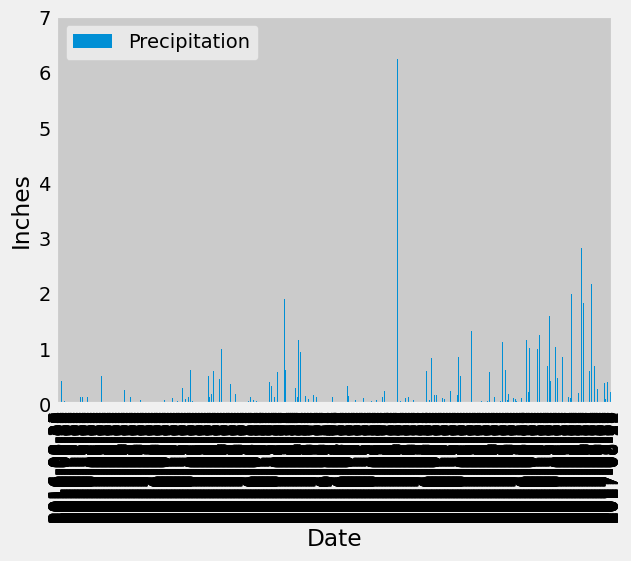

In [68]:
date = dt.datetime(2016, 8, 23)

results = session.query(measurement.date,measurement.prcp).filter(measurement.date >= date).all()

rainy_days_df = pd.DataFrame(results, columns=['Date', 'Precipitation']).dropna()

rainy_days_df.plot(kind='bar', x='Date', y='Precipitation',xlabel='Date', ylabel='Inches')

                   

In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data
rainy_days_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [22]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(station.station).count()
station_count 

9

In [23]:

activity = session.query(measurement.station).group_by(measurement.station).order_by(measurement.station.desc()).limit(1)
most_active_station = activity.first()
print(most_active_station.station)

USC00519523


In [55]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temps = [func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)]

temp_stats = session.query(*temps).filter(measurement.station == 'USC00519523').all()

temp_stats


[(56.0, 85.0, 74.5436493068565)]

<Axes: ylabel='Frequency'>

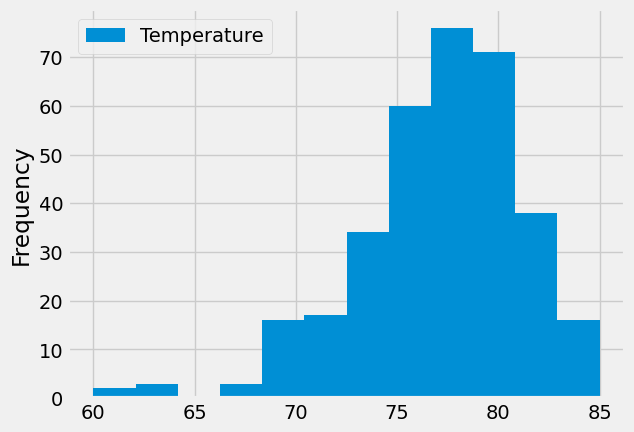

In [62]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
date = dt.datetime(2016, 8, 23)

temp_records = session.query(measurement.station,measurement.tobs).filter(measurement.date >= date, measurement.station == 'USC00519523').all()

temp_df = rainy_days_df = pd.DataFrame(temp_records, columns=['USC00519523', 'Temperature']).dropna()

temp_df.plot(kind='hist', bins=12)



# Close Session

In [ ]:
# Close Session
session.close()